In [364]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

In [365]:
data = pd.read_csv('../dataset/dilaut.csv')

In [366]:
data.head()


,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,Bawal Hitam,36000,B,Farmed,Moderately sustainable,30000
1,Bawal Putih,72000,B,Farmed,Moderately sustainable,60000
2,Cakalang,30000,B,Farmed,Moderately sustainable,25000
3,Kakap Merah,66000,B,Farmed,Moderately sustainable,55000
4,Kembung,30000,B,Farmed,Moderately sustainable,25000


In [367]:
data.tail()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
259,Kuwe,22400,C,Fishing Hook,Unsustainable,70000
260,Makerel,9600,C,Fishing Hook,Unsustainable,30000
261,Salmon,89600,C,Fishing Hook,Unsustainable,280000
262,Tenggiri,19200,C,Fishing Hook,Unsustainable,60000
263,Tongkol,12160,C,Fishing Hook,Unsustainable,38000


In [368]:
data.shape

(264, 6)

In [369]:
data.isnull().sum()

Fish Species       0
Price              0
Grade              0
Catching Method    0
Sustainability     0
Actual Price       0
dtype: int64

In [370]:
data.describe()

,Price,Actual Price
count,264.000000,264.000000
mean,49903.363636,68454.545455
std,59375.759491,69461.411301
min,6000.000000,25000.000000
25%,19200.000000,30000.000000
50%,30200.000000,55000.000000
75%,55250.000000,70000.000000
max,403200.000000,280000.000000


In [371]:
sorted(data['Price'],reverse=True)

[403200,
 336000,
 336000,
 322560,
 280000,
 268800,
 268800,
 268800,
 224000,
 224000,
 215040,
 201600,
 179200,
 168000,
 168000,
 161280,
 140000,
 134400,
 134400,
 115200,
 112000,
 112000,
 100800,
 96000,
 96000,
 92160,
 89600,
 86400,
 86400,
 84000,
 84000,
 84000,
 80640,
 80000,
 79200,
 76800,
 76800,
 76800,
 72000,
 72000,
 72000,
 72000,
 70000,
 69120,
 69120,
 67200,
 67200,
 67200,
 67200,
 66000,
 66000,
 64000,
 64000,
 63360,
 61440,
 60000,
 60000,
 57600,
 57600,
 57600,
 57600,
 57600,
 57600,
 57600,
 56000,
 56000,
 55000,
 54720,
 53760,
 52800,
 52800,
 52800,
 51200,
 50400,
 48000,
 48000,
 48000,
 48000,
 48000,
 48000,
 46080,
 46080,
 46080,
 45600,
 45600,
 44800,
 44000,
 44000,
 43776,
 43200,
 43200,
 43200,
 43200,
 42240,
 42000,
 42000,
 40320,
 40000,
 39600,
 38400,
 38400,
 38400,
 38400,
 38000,
 36480,
 36480,
 36480,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 35200,
 35000,
 34560,
 34560,
 34560,
 

In [372]:
# data = data[~(data['Price']>=6000.0) & (data['Price']<=403200.0)]
# data.shape
# data.head()

In [373]:
data['Fish Species'].unique()
data['Fish Species'] = data['Fish Species'].map({'Bawal Hitam':0,'Bawal Putih':1,'Cakalang':2,
                                                 "Kakap Merah":3,"Kembung":4,"Kerapu":5,
                                                 "Kuwe":6,"Makerel":7,"Salmon":8,
                                                 "Tenggiri":9,"Tongkol":10})

In [374]:
data['Grade'].unique()
data['Grade'] = data['Grade'].map({'A':0,'B':1,'C':2})

In [375]:
data['Sustainability'].unique()
data['Sustainability'] =data['Sustainability'].map({'Moderately sustainable':0,'Unsustainable':1})


In [376]:

data['Catching Method'].unique()
data['Catching Method'] = data['Catching Method'].map({'Farmed':0,'Netting':1, 'Spearfishing':2, 'Fishing Hook':3})

In [378]:
data

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,36000,1,0,0,30000
1,1,72000,1,0,0,60000
2,2,30000,1,0,0,25000
3,3,66000,1,0,0,55000
4,4,30000,1,0,0,25000
...,...,...,...,...,...,...
259,6,22400,2,3,1,70000
260,7,9600,2,3,1,30000
261,8,89600,2,3,1,280000
262,9,19200,2,3,1,60000


In [379]:
X = data.drop(['Price'],axis=1)
y = data['Price']
print(X.head())
print(y.head())

   Fish Species  Grade  Catching Method  Sustainability  Actual Price
0             0      1                0               0         30000
1             1      1                0               0         60000
2             2      1                0               0         25000
3             3      1                0               0         55000
4             4      1                0               0         25000
0    36000
1    72000
2    30000
3    66000
4    30000
Name: Price, dtype: int64


In [380]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [382]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[5]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [383]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

In [385]:
def lr_scheduler(epoch):
    return 0.001 * np.exp(-0.1 * epoch)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [386]:
history = model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=500, callbacks=[lr_callback])

Epoch 1/500


7/7 [==============================] - 1s 32ms/step - loss: 2650952960.0000 - mse: 2650952960.0000 - val_loss: 3678939904.0000 - val_mse: 3678939904.0000 - lr: 0.0010
Epoch 2/500
7/7 [==============================] - 0s 11ms/step - loss: 1074993536.0000 - mse: 1074993536.0000 - val_loss: 1661878016.0000 - val_mse: 1661878016.0000 - lr: 9.0484e-04
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 860191616.0000 - mse: 860191616.0000 - val_loss: 1407880576.0000 - val_mse: 1407880576.0000 - lr: 8.1873e-04
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 925301440.0000 - mse: 925301440.0000 - val_loss: 1410296192.0000 - val_mse: 1410296192.0000 - lr: 7.4082e-04
Epoch 5/500
7/7 [==============================] - 0s 10ms/step - loss: 881991488.0000 - mse: 881991488.0000 - val_loss: 1456778112.0000 - val_mse: 1456778112.0000 - lr: 6.7032e-04
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 840723008.0000 - mse: 840723008.0000

(0.0, 50.0)

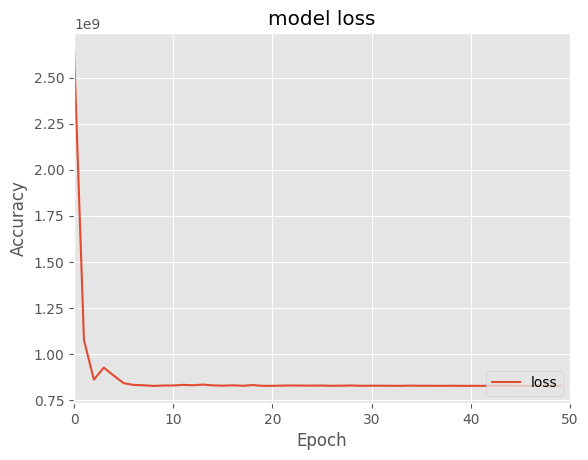

In [387]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.title('model loss')
plt.plot(history.history['mse'][:50], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xlim(0, 50)


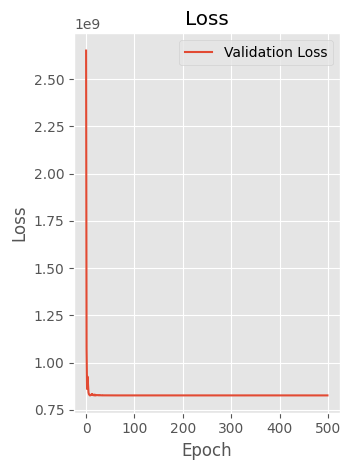

In [388]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Validation Loss')
# Add any additional metrics you want to plot, e.g., accuracy
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [389]:
y_pred1 = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [390]:
score1 = metrics.r2_score(y_test,y_pred1)
print(score1)

0.7746709375394937


In [391]:
model.save('pricepredictor.h5')

In [395]:
load = tf.keras.models.load_model('pricepredictor.h5')

data_new = pd.DataFrame({
    'Fish Species':0,
    'Grade':1,
    'Catching Method':0,
    'Sustainability':0,
    'Actual Price' : 35000

},index=[0])

if data_new['Grade'].iloc[0] == 2 or data_new['Actual Price'].iloc[0] == 0:
    result_array = np.array([0])
    float_number = float(result_array[0])
    price = float_number

else:
    prediction = model.predict(data_new)
    prediction_float = prediction.item()
    rounded_value = round(prediction_float, 1)
    price = rounded_value

print(price)

1/1 [==============================] - 0s 23ms/step
24406.4
